1.	Consider the datasets of word pairs whose similarity is manually annotated, especially MC-28, Word-Sim, RG, available at https://github.com/alexanderpanchenko/sim-eval. Similarly to the work on this repository, we would like to test the usefulness of any new similarity measure by computing its correlation with human judgment (using Pearson coefficient). Review how Pearson Coefficient works and identify python script to achieve this. Study Datamuse API, which outputs a set of words that are available to a query word. This API is available at http://www.datamuse.com/api/. 

Datasets downloaded  
Pearson np.corrcoef()  
https://github.com/gmarmstrong/python-datamuse/ used for interfacing


In [1]:
import datamuse, csv

In [2]:
api = datamuse.Datamuse()
api.words(rel_rhy='orange', max=5)

[{'word': 'door hinge', 'score': 74, 'numSyllables': 2}]

In [144]:
test = api.words(ml='dank', max=10)

In [145]:
test[0]['word']

[test[i]['word'] for i in range(len(test))]

['clammy',
 'wet',
 'damp',
 'swamp',
 'dingy',
 'grimy',
 'fetid',
 'dankest',
 'dreary',
 'windowless']

2.	We would like to test the similarity between the pair (X,Y) by using the output of the Datamuse API for both X and Y. Set the number of outcome words in the API to be large, e.g., 100. Use Jaccard similarity to compute the similarity between X and Y (Counting the ratio of common words among the outputs of X and Y Datamuse API over the total number of distinct words in the two outputs).

In [3]:
def jaccard_sim(list1, list2):
    #intersect / union
    intersect = (set(list1).intersection(list2))
    union = (len(list1) + len(list2)) - len(intersect)
    return (len(intersect) / union)

In [51]:
wordlist1 = api.words(ml='dog', max=100)
wordlist2 = api.words(ml='hound', max=100)
words1 = [wordlist1[i]['word'] for i in range(len(wordlist1))]
words2 = [wordlist2[i]['word'] for i in range(len(wordlist2))]

print(words1)
print(words2)
jaccard_sim(words1, words2)

['canis familiaris', 'hound', 'tail', 'tag', 'heel', 'firedog', 'chase', 'trail', 'bounder', 'blackguard', 'track', 'frump', 'cad', 'pawl', 'click', 'go after', 'andiron', 'chase after', 'domestic dog', 'detent', 'puppy', 'pooch', 'pup', 'pet', 'canine', 'cats', 'terrier', 'pets', 'poodle', 'doggie', 'animal', 'mutt', 'doggy', 'bloodhound', 'rooster', 'goat', 'horse', 'monkey', 'pig', 'handler', 'stray', 'cow', 'hotdog', 'duck', 'boy', 'lapdog', 'beast', 'biscuit', 'jackal', 'girl', 'whelp', 'sled', 'ape', 'sausage', 'man', 'fluffy', 'doll', 'dogg', 'gun', 'guy', 'rascal', 'turd', 'buddy', 'refrigerator', 'fridge', 'toilet', 'neighborhood', 'pal', 'dude', 'bum', 'devil', 'bro', 'piggy', 'sleigh', 'cane', 'pack', 'wild', 'hell', 'scoundrel', 'mate', 'stupid', 'silly', 'chum', 'dumb', 'rabble', 'barney', 'bud', 'chien', 'stinker', 'death', 'evelyn', 'doug', 'god', 'blood', 'oscar', 'boring', 'christ', 'kau', 'hammer', 'watchdog']
['hound dog', 'dog', 'hunt', 'bounder', 'blackguard', 'cad

0.08695652173913043

NOW GET SOME NICE FORMULAS FOR JACCARD AND PEARSON FOR LATEX

3.	Repeat this process of calculating the similarity between each pair in MC-28 dataset, and then calculate the correlation coefficient with the human judgment using Pearson coefficient. Try to optimize the parameters of Datamuse API call by testing distinct number of outputs and monitor the value of the correlation until you reach the highest correlation value. Use this configuration to calculate the correlation value for other datasets, and compare the result with other state-of-art results as reported in relevant literature (e.g., previous sim-eval repository) .

SIM EVAL NORMALIZES SCORES TO 0,1 WITH MAX BEING 1 SO LET'S DO THAT AS WELL

In [61]:
mcreader = csv.reader(open('mc.csv'), delimiter = ';')
mcwords = []
for i in mcreader:
    mcwords.append(i)

In [62]:
sims = []
for i in range(len(mcwords)):
    sims.append(round(float(mcwords[i][2]),3))

In [63]:
maxsim = 4
for i in range(len(sims)):
    sims[i] = ((sims[i])/(maxsim))
print(sims)

[0.98, 0.96, 0.96, 0.94, 0.925, 0.9025, 0.875, 0.855, 0.7775, 0.77, 0.7625, 0.7425, 0.7375, 0.705, 0.415, 0.42, 0.29, 0.275, 0.2375, 0.2225, 0.2175, 0.21, 0.1575, 0.1375, 0.105, 0.105, 0.0325, 0.0275, 0.02, 0.02]


In [64]:
for i in range(len(mcwords)):
    mcwords[i][2] = round(sims[i], 4)

In [65]:
print(mcwords)

[['automobile', 'car', 0.98], ['gem', 'jewel', 0.96], ['journey', 'voyage', 0.96], ['boy', 'lad', 0.94], ['coast', 'shore', 0.925], ['asylum', 'madhouse', 0.9025], ['magician', 'wizard', 0.875], ['midday', 'noon', 0.855], ['furnace', 'stove', 0.7775], ['food', 'fruit', 0.77], ['bird', 'cock', 0.7625], ['bird', 'crane', 0.7425], ['implement', 'tool', 0.7375], ['brother', 'monk', 0.705], ['brother', 'lad', 0.415], ['crane', 'implement', 0.42], ['car', 'journey', 0.29], ['monk', 'oracle', 0.275], ['cemetery', 'woodland', 0.2375], ['food', 'rooster', 0.2225], ['coast', 'hill', 0.2175], ['forest', 'graveyard', 0.21], ['shore', 'woodland', 0.1575], ['monk', 'slave', 0.1375], ['coast', 'forest', 0.105], ['lad', 'wizard', 0.105], ['cord', 'smile', 0.0325], ['glass', 'magician', 0.0275], ['rooster', 'voyage', 0.02], ['noon', 'string', 0.02]]


In [66]:
def wordcombosim(wordlist, maxlength=100):
    #Wordlist is a list of word combinations where wordlist[i][0] is the first word and wordlist[i][1] the second.
    mcsimilarities = []

    for i in range(len(wordlist)):
        word1 = api.words(ml=str(wordlist[i][0]), max=maxlength)
        word2 = api.words(ml=str(wordlist[i][1]), max=maxlength)
        words1 = [word1[j]['word'] for j in range(len(word1))]
        words2 = [word2[j]['word'] for j in range(len(word2))]
        mcsimilarities.append(jaccard_sim(words1, words2))
    return mcsimilarities

In [67]:
#SAVES TASK3 DATA, CAN BE FOUND IN MCCOMBOJACCARDMATRIX.CSV, Records jaccard similarity of every pair in MC, with maxlength going from 100 to 1.
combojacmatrix = []
for i in range(100,0,-1):
    combojacmatrix.append(wordcombosim(mcwords, i))
    print(combojacmatrix)

[[0.12359550561797752, 0.30718954248366015, 0.21951219512195122, 0.1695906432748538, 0.19760479041916168, 0.030927835051546393, 0.1695906432748538, 0.22699386503067484, 0.21951219512195122, 0.010101010101010102, 0.010101010101010102, 0.005025125628140704, 0.005025125628140704, 0.02040816326530612, 0.0989010989010989, 0.0, 0.02040816326530612, 0.03626943005181347, 0.015228426395939087, 0.0, 0.010101010101010102, 0.0, 0.0, 0.005025125628140704, 0.0, 0.010101010101010102, 0.0, 0.0, 0.0, 0.0]]


KeyboardInterrupt: 

Jaccard matrix is a similarity matrix for decreasing max length of mcwords wordlist

In [64]:
#WRITES PREVIOUS TO CSV, ALREADY DONE
with open('nicecsv.csv', 'w', newline='') as f:
    writer = csv.writer(f)
    for i in combojacmatrix:
        writer.writerow(i)

In [68]:
#READ THE WRITTEN MATRIX
readcombojacmatrix = []
with open('mccombojaccardmatrix.csv') as f:
    reader = csv.reader(f)
    for i in reader:
        readcombojacmatrix.append(i)

In [69]:
#Make str values floats to return csv to values extracted from api
for i in range(len(readcombojacmatrix)):
    for j in range(len(readcombojacmatrix[i])):
        readcombojacmatrix[i][j] = float(readcombojacmatrix[i][j])
        
#combojacmatrix == readcombojacmatrix

In [70]:
import numpy as np
import matplotlib.pyplot as plt

In [71]:
#Make a nice array of 0-100 maxlength similarity means. Reversed to 0-100 for plotting purposes.
readcombojacmatrixmeans = []
for i in readcombojacmatrix:
    readcombojacmatrixmeans.append(np.mean(i))
readcombojacmatrixmeans.reverse()
print(readcombojacmatrixmeans)

[0.03333333333333333, 0.02222222222222222, 0.03666666666666667, 0.04063492063492064, 0.04761904761904761, 0.05383838383838384, 0.052939652939652936, 0.04958374958374958, 0.04782051282051283, 0.054057529444526346, 0.05720854423640801, 0.05301501836432513, 0.04804856673964226, 0.05060060283248689, 0.05667896820820359, 0.060882796250725194, 0.06583562097688905, 0.06523336816440264, 0.06494432373456453, 0.06997136695261892, 0.06789207961842074, 0.0720806464514066, 0.07369443782492185, 0.07448265980050663, 0.07671626158985369, 0.07488525830147091, 0.07328242401539432, 0.0719205717943093, 0.07364067867350059, 0.07310303152075413, 0.074001440604536, 0.07288076494706068, 0.07190559692662273, 0.0693160140610877, 0.06690716186210634, 0.06597647870190405, 0.06895975192949472, 0.06994088765718615, 0.06961001932519767, 0.06860373914126416, 0.06971692681346635, 0.07001917821823754, 0.0698678838056074, 0.07153507798310099, 0.07192385950303323, 0.07102119149634646, 0.07045005096258192, 0.0709029307623

In [72]:
#Index of max mean value of maxlength
print(max(range(len(readcombojacmatrixmeans)), key=readcombojacmatrixmeans.__getitem__))

24


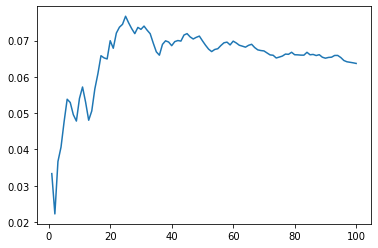

In [73]:
x = np.linspace(1,100,100)
fig = plt.figure()
plt.plot(x, readcombojacmatrixmeans)
plt.show()

DO PEARSON STUFF

HIGHEST SIM SCORE WITH MAXLENGTH BEING 25.

4.	We would like to test the above strategy at sentence level as well. For this purpose, given sentence S1 and S2, which are tokenized for instance as S1=(w1, w2,..,wn) and S2= (p1, p2, …, pm). Then, the representation of S1, will consist of the overlap of the Datamuse output of each individual token w1, w2,…wm (It is important to set the number of outputted words per API call high in order to increase the chance of overlapping), add to this list the tokens of S1 as well. Repeat the same process for S2 and then compute the similarity between S1 and S2 as jaccard similarity of the representation of S1 and representation of S2. Write a simple python code that allows you to achieve this.

In [74]:
sentence1 = "Nice sentence for for the people folks good"
sentence2 = "Another sentence if you please"
sentence1 = np.unique(sentence1.split())
sentence2 = np.unique(sentence2.split())
print(sentence1)
print(sentence2)

['Nice' 'folks' 'for' 'good' 'people' 'sentence' 'the']
['Another' 'if' 'please' 'sentence' 'you']


In [75]:
def sentencerepwithoverlap(sentence, maxlength):
    rep = []
    for i in range(len(sentence)):
        word = api.words(ml=str(sentence[i]), max=maxlength)
        words = [word[j]['word'] for j in range(len(word))]
        rep.append(words)
    return rep

In [76]:
replist1 = sentencerepwithoverlap(sentence1, 50)
replist2 = sentencerepwithoverlap(sentence2, 50)

In [77]:
#Get intersecting words from sentence words pairwise.
def pairwiseintersect(replist):
    intersects = []
    print(len(replist))
    for i in range(len(replist)):
        if i != len(replist):
            for j in range(i+1, len(replist)):
                intersects.append(set(replist[i]).intersection(replist[j]))
    return np.unique(intersects)

In [78]:
intersect1 = pairwiseintersect(replist1)
intersect2 = pairwiseintersect(replist2)

7
5


In [79]:
#Clean messy sets and add the overlapping words to original sentence representation
if intersect1[0] == set():
    intersect1 = intersect1[1:]
for i in intersect1:
    for j in i:
        sentence1 = np.append(sentence1, j)
if intersect2[0] == set():
    intersect2 = intersect2[1:]
for i in intersect2:
    for j in i:
        sentence2 = np.append(sentence2, j)

In [80]:
print(sentence1)
print(sentence2)
jaccard_sim(sentence1, sentence2)

['Nice' 'folks' 'for' 'good' 'people' 'sentence' 'the' 'friends' 'great'
 'good' 'need' 'next' 'gracious' 'nifty' 'great' 'kind' 'skillful' 'neat'
 'pleasing' 'cool' 'respectable' 'fine' 'great' 'persons' 'everyone'
 'everybody' 'families' 'men' 'individuals' 'time']
['Another' 'if' 'please' 'sentence' 'you' 'that' 'else' 'even' 'like'
 'may' 'yes' 'sorry']


0.024390243902439025

In [85]:
print(readcombojacmatrix[1])
print(readcombojacmatrix[24])
#Highest Pearson correlation coefficient of human evaluated MC and jaccard sim-based evaluation (Task 3)
print(np.corrcoef(readcombojacmatrix[21],sims))
#Jaccard of sentence 1,2 with task 4 parameters added.
jaccard_sim(sentence1,sentence2)

[0.125, 0.31125827814569534, 0.2222222222222222, 0.17159763313609466, 0.2, 0.03125, 0.17159763313609466, 0.22981366459627328, 0.2147239263803681, 0.01020408163265306, 0.01020408163265306, 0.005076142131979695, 0.005076142131979695, 0.020618556701030927, 0.1, 0.0, 0.015384615384615385, 0.03664921465968586, 0.015384615384615385, 0.0, 0.01020408163265306, 0.0, 0.0, 0.005076142131979695, 0.0, 0.005076142131979695, 0.0, 0.0, 0.0, 0.0]
[0.16030534351145037, 0.26666666666666666, 0.2459016393442623, 0.1875, 0.216, 0.034013605442176874, 0.14285714285714285, 0.256198347107438, 0.22580645161290322, 0.006622516556291391, 0.013333333333333334, 0.0, 0.006622516556291391, 0.02702702702702703, 0.10948905109489052, 0.0, 0.020134228187919462, 0.02702702702702703, 0.006622516556291391, 0.0, 0.013333333333333334, 0.0, 0.0, 0.0, 0.0, 0.006622516556291391, 0.0, 0.0, 0.0, 0.0]
[[1.         0.71909637]
 [0.71909637 1.        ]]
[[1.         0.72040608]
 [0.72040608 1.        ]]


0.024390243902439025

5.	We want to test this strategy on publicly available sentence database. For this purpose, use STSS-131 dataset, available in “A new benchmark dataset with production methodology for short text semantic similarity algorithms” by O’Shea, Bandar and Crockett (ACM Trans. on Speech and Language Processing, 10, 2013). Use Pearson correlation coefficient to test the correlation with the provided human judgment. 

STSS FOUND IN FILE STSS-131
QNumber;Sentence1;Sentence2;Human Eval of semantic similarity(0-4);Stdev of Similarity(noisiness)

In [133]:
#READ SENTENCES FROM STSS-131
stsslist = [[],[],[]]
with open('STSS-131.csv') as f:
    reader = csv.reader(f,delimiter = ';')
    for i in reader:
        stsslist[0].append(list(np.unique((i[1].split()))))
        stsslist[1].append(list(np.unique((i[2].split()))))
        stsslist[2].append(float(i[3])/4)

In [117]:
print(jaccard_sim(stsslist[0][0],stsslist[1][0]))

0.13636363636363635


In [134]:
print(stsslist[0][0])

['Would', 'drink', 'go', 'like', 'me', 'out', 'to', 'tonight?', 'with', 'you']


In [135]:
sentencerep = (sentencerepwithoverlap(stsslist[1][0],21))
print(sentencerep)
print(pairwiseintersect(sentencerep))

[[], ['capo', 'did', 'donned', 'donning', 'juan', 'not', 'rostov', 'wear', 'giovanni', 'grandee', 'shall', 'sport', 'that', 'these', 'think', 'tutor', 'would', 'assume', 'azov', 'charles', 'dom'], ['consume', 'feed', 'deplete', 'corrode', 'wipe out', 'run through', 'exhaust', 'rust', 'eat on', 'eat up', 'use up', 'devour', 'dine', 'cook', 'meal', 'chew', 'chow', 'snack', 'drink', 'gobble', 'meals'], ['get', 'move', 'proceed', 'run', 'turn', 'start', 'live', 'work', 'pass', 'travel', 'operate', 'die', 'extend', 'depart', 'survive', 'belong', 'break', 'fit', 'endure', 'fail', 'fling'], ['recognize', 'acknowledge', 'love', 'cognize', 'screw', 'live', 'eff', 'hump', 'experience', 'bang', 'bonk', 'sleep with', 'jazz', 'have sex', 'bed', 'make love', 'make out', 'be intimate', 'do it', 'get it on', 'get laid'], ['could', 'can', 'mightiness', 'power', 'possibly', 'perhaps', 'probably', 'ought', 'maybe', 'likely', 'potentially', 'possible', 'possibility', 'gonna', 'potential', 'likelihood', 'b

In [160]:
sentencereplist = [[],[]]
for i in range(len(stsslist[0])):
    sentencerep1 = sentencerepwithoverlap(stsslist[0][i],21)
    sentencerep2 = sentencerepwithoverlap(stsslist[1][i],21)
    intersect1 = pairwiseintersect(sentencerep1)
    intersect2 = pairwiseintersect(sentencerep2)
    if intersect1[0] == set():
        intersect1 = intersect1[1:]
    if intersect2[0] == set():
        intersect2 = intersect2[1:]
    sentencereplist[0].append(intersect1)
    sentencereplist[1].append(intersect2)
    print(intersect1)
    print(intersect2)

10
13
[{'wish'} {'all'} {'die'} {'this'} {'start'}]
[{'quite'} {'live'} {'yeah'}]
13
10
[{'try'} {'something', 'anything'} {'really'} {'deal'}]
[{'consider'} {'now', 'let'} {'about'} {'need', 'have'} {'involve'}
 {'try'} {'let'} {'needs', 'wanna', 'let', 'ought', 'gotta'}]
16
11
[{'just'} {'way'}]
[{'wanna'}
 {'first', 'west', 'way', 'world', 'background', 'lord', 'revised', 'word', 'proposed', 'red', 'will', 'sacred', 'road', 'wind', 'need', 'editor', 'end', 'third', 'collected', 'second', 'recommended'}]
12
9
[{'execute', 'cause', 'come', 'perform', 'get along', 'dress', 'suffice', 'make', 'practice', 'fare', 'exercise', 'answer', 'practise', 'serve', 'ut', 'arrange', 'manage', 'behave', 'bash', 'act', 'set'}
 {'try'} {'serve'} {'even', 'bit', 'little'}]
[{'let'} {'see'}]
14
11
[{'will'} {'all'} {'probably'} {'now'} {'all'} {'wanna'} {'know'} {'all'}
 {'wanna'} {'need'} {'needs', 'wanna', 'let', 'ought', 'gotta'} {'should'}
 {'would'} {'sure'}]
[{'need'} {'background'} {'expected', '

In [341]:
test = [[],[]]
for i in range(len(sentencereplist[0])):
        test[0].append([list(j) for j in (sentencereplist[0][i])])
for i in range(len(sentencereplist[1])):
        test[1].append([list(j) for j in (sentencereplist[1][i])])

In [462]:

finalsentencerep1 = [[] * 1 for i in range(len(test[0]))]
finalsentencerep2 = [[] * 1 for i in range(len(test[0]))]
for i in range(len(test[0])):
    for j in range(len(test[0][i])):
        for k in test[0][i][j]:
            finalsentencerep1[i].append(k)
for i in range(len(test[1])):
    for j in range(len(test[1][i])):
        for k in test[1][i][j]:
            finalsentencerep2[i].append(k)

In [465]:
print(finalsentencerep2)

[['quite', 'live', 'yeah'], ['consider', 'now', 'let', 'about', 'need', 'have', 'involve', 'try', 'let', 'needs', 'wanna', 'let', 'ought', 'gotta'], ['wanna', 'first', 'west', 'way', 'world', 'background', 'lord', 'revised', 'word', 'proposed', 'red', 'will', 'sacred', 'road', 'wind', 'need', 'editor', 'end', 'third', 'collected', 'second', 'recommended'], ['let', 'see'], ['need', 'background', 'expected', 'let', 'wanna'], ['separate', 'say', 'know', 'now', 'let', 'try'], ['huh', 'really', 'without', 'stop', 'really', 'only', 'hey', 'only', 'yeah', 'really', 'none', 'everything', 'only', 'yes', 'just'], ['wish', 'doing', 'really', 'expected', 'now', 'this', 'let', 'gonna', 'wanna', 'all'], ['die', 'deal', 'need', 'let', 'all', 'everything', 'second', 'end', 'first', 'added'], ['that', 'not', 'all', 'just', 'first', 'west', 'way', 'world', 'background', 'lord', 'revised', 'word', 'proposed', 'red', 'will', 'sacred', 'road', 'wind', 'need', 'editor', 'end', 'third', 'collected', 'second'

In [494]:
with open('sentencerep1.csv', 'w', newline='') as f:
    writer = csv.writer(f, delimiter=' ')
    for i in finalsentencerep1:
        writer.writerow(i)

In [495]:
with open('sentencerep2.csv', 'w', newline='') as f:
    writer = csv.writer(f, delimiter=' ')
    for i in finalsentencerep2:
        writer.writerow(i)

In [489]:
readsentencerep1 = []
with open('STSSsentencerep1.csv') as f:
    reader = csv.reader(f,delimiter = ' ')
    for i in reader:
        readsentencerep1.append(i)

In [496]:
readsentencerep2 = []
with open('STSSsentencerep2.csv') as f:
    reader = csv.reader(f,delimiter = ' ')
    for i in reader:
        readsentencerep2.append(i)

In [497]:
print((readsentencerep1)==finalsentencerep1)
print((readsentencerep2)==finalsentencerep2)

True
True


6.	Repeat the process of sentence similarity of STSS-131 but using word2vec embedding as in the labs assuming the vector representation of a sentence is the average of the word embedding vectors of all tokens in the sentence. Calculate the corresponding Pearson correlation as well. 

7.	Repeat 6) when using Glove and FastText embedding. Comment on the overall performance of Datamuse API based approach for text similarity. 

8.	Study the programs in https://github.com/gsi-upm/sematch they attempt to provide other individual similarity but using other lexical database, not necessarily WordNet. Accommodate the provided files into your compare and repeat the calculus of Sim(S1,S2) for each pair of sentence where the individual similarity Sim(s,t) is calculated using YAGO concepts or DBPedia concepts freely available from the program. Compare the behavior of the result.

9.	Suggest GUI of your own that facilitate the demonstration of your finding above